In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

### Считывание данных из Google drive

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/hw_abt_2_byuser.csv', sep = '\t', index_col = 0)
df

,group_id,metric_value,users,visits,churn_users,churn_visits,group
0,8,6630.000,0,0,0,8,A
1,13,6933.976,0,0,1,6,B
2,10,8261.976,1,10,1,8,B
3,4,5522.000,1,9,1,7,A
4,16,5075.976,1,6,0,8,B
...,...,...,...,...,...,...,...
4995,6,3666.000,1,4,1,5,A
4996,12,6464.976,0,0,1,8,B
4997,1,4335.000,0,0,0,8,A
4998,13,6307.976,0,0,1,8,B


### Импортирование библиотек

In [3]:
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [4]:
pip install bootstrapped

  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13954 sha256=896b5c624f28b23a6baa9f8b31e86664fc7a70ceb763fe309a6e872e5f006f74
  Stored in directory: /root/.cache/pip/wheels/15/55/6a/9a722f067ac4c3dfab359ed2ec7906b9cc6649156d9886bd59
Successfully built bootstrapped


In [5]:
from bootstrapped import bootstrap as bs
from bootstrapped import compare_functions as bs_compare
from bootstrapped import stats_functions as bs_stats

### Разбивка всего data_frame на 2 по подгруппам A и B

In [6]:
df_groupA = df[df['group'] == 'A']
df_groupB = df[df['group'] == 'B']
print(type(df_groupB))
print(type(df))
df_groupB.groupby(df_groupB['metric_value'])
df_groupB.groupby(df_groupB['metric_value'])

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### Использование разных метрик

In [ ]:
# Метрика metric_value - близка к нормальному распределению
ser1 = df_groupA['metric_value']
ser2 = df_groupB['metric_value']

# метрика2
# ser1 = df_groupA['churn_users']
# ser2 = df_groupB['churn_users']

### Графики разных метрик

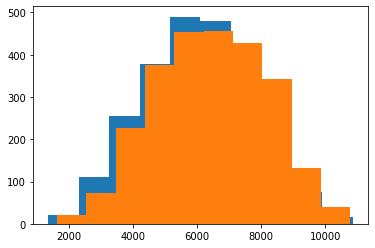

In [ ]:
plt.hist(ser1)
plt.hist(ser2)
plt.show()


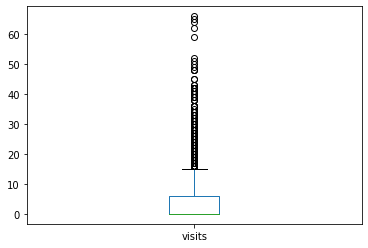

In [ ]:
pd.Series(ser1).plot.box()

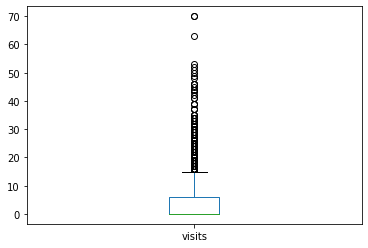

In [ ]:
pd.Series(ser2).plot.box()

## Использование разных критериев

### Критерий Шапиро - проверка на нормальность распределений по группам A и B

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro

alpha = 0.05

st1 = shapiro(pd.Series(ser1))
print('Distributions is {}normal\n'.format( {True:'not ', False:''}[st1[1] < alpha]))

st2 = shapiro(pd.Series(ser2))
print('Distributions is {}normal\n'.format( {True:'not ', False:''}[st2[1] < alpha]))


Distributions is not normal

Distributions is not normal



### H-критерий Краскела-Уоллиса для обычных метрик для проверки равества медиан


In [ ]:
import pandas
from scipy.stats import mstats

H, pval = mstats.kruskalwallis(ser1.array, ser2.array)

print("H-statistic:", H)
print("P-Value:", pval)
if pval < 0.05: print("Reject H0 - Significant differences exist between groups.")
else: print("Accept H0 - No significant difference between groups.")


H-statistic: 71.07002351983432
P-Value: 3.447687401926811e-17
Reject H0 - Significant differences exist between groups.


### Использьзование bootstrap для проверки на статзначимость

In [10]:

bs_data_a = bs.bootstrap(df_groupA['users'].values,
                         stat_func=bs_stats.mean, num_iterations=10000,
                         iteration_batch_size=300,
                         return_distribution=True)
bs_data_b = bs.bootstrap(df_groupB['users'].values,
                         stat_func=bs_stats.mean, num_iterations=10000,
                         iteration_batch_size=300,
                         return_distribution=True)
bs_ab_estims = bs.bootstrap_ab(df_groupA['users'].values,
    df_groupB['users'].values,
    bs_stats.mean,
    bs_compare.percent_change, num_iterations=5000, alpha=0.10,
    iteration_batch_size=100, scale_test_by=1, num_threads=4)



#### Не использовала T-критерий Уилкоксона, тк нужно равенство размеров выборок. Не использовала критерий Колмогорова-Смирнова, тк критерий Шапиро-Уилка имеет бОльшую мощность.